In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

plt.style.use("classic")

$\text{삶의 만족도} = \theta_0 + \theta_1 \times \text{1인당\_GDP}$

여기서 $\theta_0 과 \theta_1$ 은 모델의 파라미터이다. 

---

#### $\hat{y} = \theta_0 + \theta_1 \times x_1 + \theta_2 \times x_2 + \cdots + \theta_n \times x_n$

- $\hat{y}$ 는 예측값이다.

- $n$ 은 특성의 수입니다.

- $x_i$ 는 $i$ 번째 특성값입니다.

- $\theta_j$ 는 $j$ 번째 모델 파라미터입니다. (편향 $\theta_0$ 과 특성 가중치 $\theta_1, \theta_2, \cdots, \theta_n$ 을 포함합니다)


#### 벡터 표현) $\hat{y} = h_\theta(\mathbf{x}) = \theta \cdot \mathbf{x}$

- $\theta$ 는 편향 $\theta_0$ 과 특성 가중치 $\theta_1, \theta_2, \cdots, \theta_n$ 을 포함하는 모델의 파라미터 벡터입니다.

- $\mathbf{x}$ 는 $x_0$ 에서 $x_n$ 까지 포함하는 샘플의 특성 벡터입니다. $x_0$ 는 항상 1입니다.

- $\theta \cdot \mathbf{x}$ 는 $\theta$ 와 $\mathbf{x}$ 의 점곱입니다. 이는 $\theta_0 x_0 + \theta_1 x_1 + \cdots + \theta_n x_n$ 과 같습니다.

- $h_\theta$ 는 모델 파라미터 $\theta$ 를 사용한 가설 함수입니다.

---





### 점곱과 행렬곱의 구분

#### 행렬곱 : (n, m) * (m, l) = (n, l) 
- 결과값이 행렬
#### 접곱(스칼라곱, 점곱, 내적) = 두 벡터의 각 원소를 곱해 더한 값 
- 결과값이 스칼라인 것

### 참고
#### $a \cdot b = a^T b$
- $a$ 와 $b$ 는 둘 다 벡터입니다.

---




### 선형 회귀 모델의 훈련과정

#### 1. 모델 파라미터를 임의의 값으로 초기화
#### 2. 훈련 세트에 대한 모델의 예측값과 실제값의 오차를 계산
#### 3. 오차가 작아지는 방향으로 모델 파라미터를 조금씩 수정

---

### 선형 회귀 모델의 MSE(평균 제곱 오차) 비용 함수

#### $MSE(\mathbf{X}, h_\theta) = \frac{1}{m} \sum_{i=1}^{m} (\theta^T \mathbf{x}^{(i)} - y^{(i)})^2$

- $x^{(i)}$ 는 $i$ 번째 샘플의 전체 특성값을 담은 벡터입니다.

---



## 정규방정식

#### $\hat{\theta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

- $\hat{\theta}$ 는 비용 함수를 최소화하는 $\theta$ 값입니다.

- $\mathbf{y}$ 는 $y^{(1)}$ 에서 $y^{(m)}$ 까지 포함하는 타깃 벡터입니다.

## 실험

### 무작위로 생성한 선형 데이터

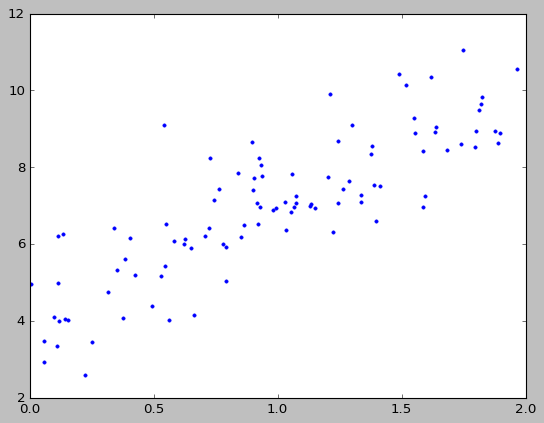

In [19]:
# 3x+4 + noise 를 데이터로 생성합니다.
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")

### 정규방정식을 사용한 선형회귀


In [20]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best


array([[4.14767685],
       [2.91008205]])

In [21]:
# 새로운 샘플에 대한 예측
X_new = np.array([[0],[2],[4]])
X_new_b = np.c_[np.ones((3,1)), X_new] # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best) 
y_predict

array([[ 4.14767685],
       [ 9.96784096],
       [15.78800507]])

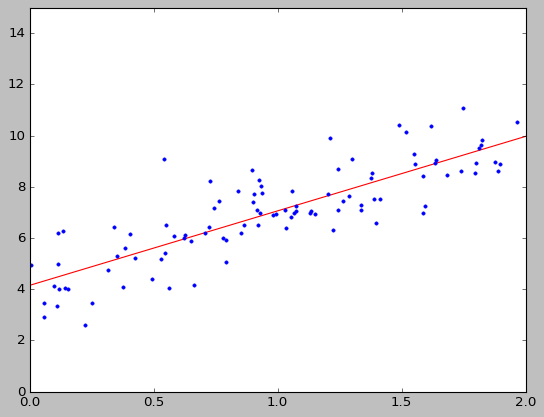

In [22]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

### 사이킷런을 이용한 선형 회귀

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("학습된 가중치와 절편 :")
print(lin_reg.intercept_, lin_reg.coef_, end="\n\n")
print("새로운 샘플에 대한 예측 :")
print(lin_reg.predict(X_new))

학습된 가중치와 절편 :
[4.14767685] [[2.91008205]]

새로운 샘플에 대한 예측 :
[[ 4.14767685]
 [ 9.96784096]
 [15.78800507]]


### 계산복잡도

#### 정규방정식

- 특성 수에 따라서는 역행렬을 계산하는데 걸리는 시간이 $O(n^{2.4})$ 에서 $O(n^3)$ 사이입니다.

#### 사이킷런으로 선형 회귀 수행

- SVD(특이값 분해) 방법은 $O(n^2)$ 입니다.

---

# 경사 하강법

## 배치 경사 하강법


### 비용함수의 편도함수

- $\frac{\partial}{\partial \theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m} (\theta^T \mathbf{x}^{(i)} - y^{(i)}) x_j^{(i)}$

### 비용함수의 그레이디언트 벡터

- $\nabla_\theta MSE(\theta) = \begin{pmatrix} \frac{\partial}{\partial \theta_0} MSE(\theta) \\ \frac{\partial}{\partial \theta_1} MSE(\theta) \\ \vdots \\ \frac{\partial}{\partial \theta_n} MSE(\theta) \end{pmatrix} = \frac{2}{m} \mathbf{X}^T (\mathbf{X} \theta - \mathbf{y})$

### 경사 하강법의 스텝

- $\theta^{(next step)} = \theta - \eta \nabla_\theta MSE(\theta)$

---

### 경사하강법 구현

In [24]:

eta = 0.1 # 학습률
n_iterations = 1000
m = 100 

theta = np.random.randn(2,1) # 무작위 초기화

for iterations in range(n_iterations) :
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
print(theta)

[[4.14767685]
 [2.91008205]]


---

## 확률적 경사 하강법

- 배치 경사 하강법은 매 스텝에서 전체 훈련 세트를 사용하여 그레이디언트를 계산합니다. 이와 달리 확률적 경사 하강법은 매 스텝에서 딱 한 개의 샘플을 무작위로 선택하여 그레이디언트를 계산합니다.

### 배치 경사 하강법과 확률적 경사 하강법의 비교

### 확률적 경사 하강법의 장점

- 매우 큰 훈련 세트를 다룰 수 있습니다.

- 훈련이 매우 빠릅니다.

- 비용함수가 불규칙적일 경우 지역 최솟값을 건너뛸 가능성이 높습니다. (불안전성 때문)

### 확률적 경사 하강법의 단점

- 확률적이기 때문에 배치 경사 하강법보다 훨씬 불안정합니다.

- 비용 함수가 최솟값에 다다르면 훈련을 중지해야 합니다.


### 학습 스케줄

- 확률적 경사하강법에서는 비용함수가 최솟값에 안착하는게 불안정적이므로 학습률을 점진적으로 줄이는 기법을 사용합니다. 이때 학습률을 결정하는 함수를 학습 스케줄이라고 합니다.

### 학습 스케쥴을 사용한 확률적 경사 하강법의 구현


In [25]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t) :
    return t0 / (t + t1)

for epoch in range(n_epochs) :
    for i in range(m) : 
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        y1 = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - y1)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
print(theta)
        
        

[[4.17908727]
 [2.88764774]]


### 사이킷런을 이용한 확률적 경사하강법

In [26]:
from sklearn.linear_model import SGDRegressor
# epoch = 최대 1000번, 최소 손실률 = 1e-3, 규제 없음, 학습률 = 0.1(기본 학습 스키쥴을 사용)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.07935067] [2.98091502]


## 미니 배치 경사 하강법

- 미니 배치 경사 하강법은 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그레이디언트를 계산하는 것이 아니라 미니 배치라고 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산합니다.

### 선형 회귀를 사용한 알고리즘 비교

- 정규방정식 : $\mathbf{X}^T \mathbf{X}$ 의 역행렬을 계산해야 하므로 특성 수가 많아지면 역행렬을 계산하는데 시간이 오래 걸립니다.

- SVD : 특성 수에 따라 계산복잡도가 $O(n^2)$ 에서 $O(n^3)$ 사이입니다.

- 배치 경사 하강법 : 특성 수에 민감하지 않지만 훈련 세트가 커지면 매우 느려집니다.

- 확률적 경사 하강법 : 훈련 세트가 커지면 훨씬 빠릅니다. 하지만 배치 경사 하강법보다 불안정합니다.

- 미니 배치 경사 하강법 : 배치 경사 하강법보다 빠르고 안정적입니다. 하지만 지역 최솟값에서 탈출하는 것이 더 힘듭니다.

---

# 다항 회귀

- 비선형 데이터를 학습하는데 선형 모델을 사용할 수 있습니다. 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시킵니다.

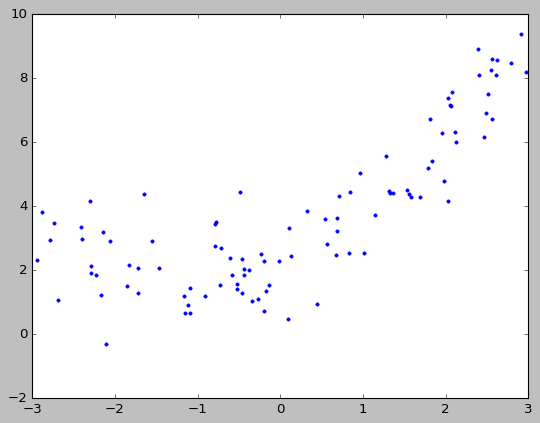

In [27]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X, y, "b.")

- 직선은 위 데이터와 잘 맞지 않습니다. 그러므로 특성을 추가하여 데이터를 변형시키는 것이 필요합니다. 여기서는 특성의 제곱을 새로운 특성으로 추가합니다.

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[2.117534]
[2.117534   4.48395026]


In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.29008015] [[1.00048796 0.44494946]]


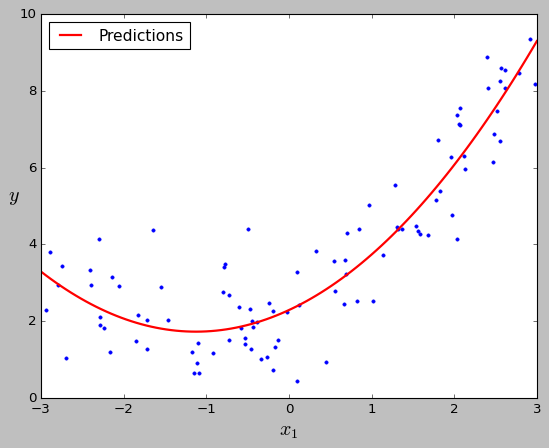

In [30]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1) 
X_new_poly = poly_features.transform(X_new) 
y_new = lin_reg.predict(X_new_poly) 

plt.plot(X, y, "b.") 
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show() 
